<a href="https://colab.research.google.com/github/nepalprabin/deeplearning-tensorflow/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.2.0-rc3'

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

**Loading data**

In [5]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_cats_val

In [9]:
print("Total training cat images:", num_cats_tr)
print("Total training dog images:", num_dogs_tr)

print("Total validation cat images:", num_cats_val)
print("Total validation dog images:", num_dogs_val)

print("Total training images:", num_cats_val)
print("Total validation images:", num_dogs_val)

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total training images: 500
Total validation images: 500


**Setting up variables while preprocessing the dataset and training the network**

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Data Preparation

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


Visualizing training images

In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

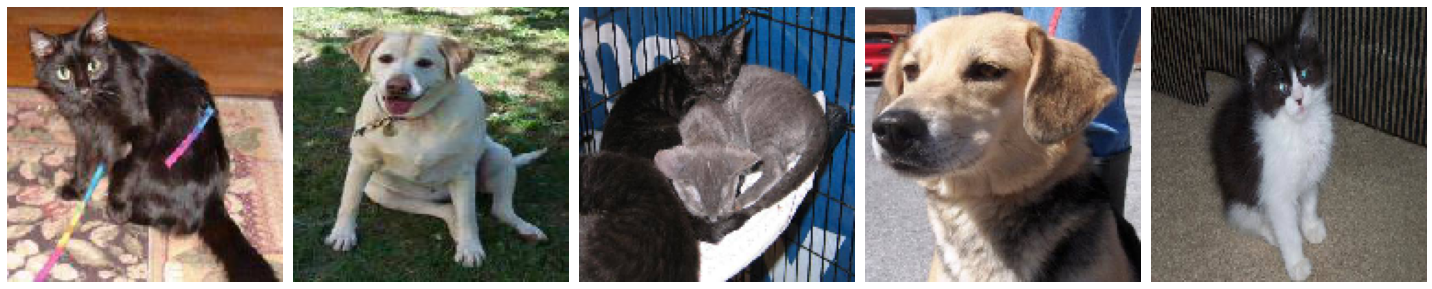

In [16]:
plotImages(sample_training_images[5:10])

### Creating the model

In [0]:
model = Sequential([
                    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)
])

## Compiling the model

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Training the model

In [20]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps=total_val//batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 8s 558ms/step - loss: 1.0042 - accuracy: 0.4915 - val_loss: 0.6922 - val_accuracy: 0.4955
Epoch 2/15
15/15 [==============================] - 8s 556ms/step - loss: 0.6901 - accuracy: 0.4990 - val_loss: 0.6787 - val_accuracy: 0.5022
Epoch 3/15
15/15 [==============================] - 8s 565ms/step - loss: 0.6806 - accuracy: 0.5171 - val_loss: 0.6659 - val_accuracy: 0.5502
Epoch 4/15
15/15 [==============================] - 8s 548ms/step - loss: 0.6605 - accuracy: 0.5929 - val_loss: 0.6499 - val_accuracy: 0.5547
Epoch 5/15
15/15 [==============================] - 8s 549ms/step - loss: 0.6305 - accuracy: 0.5839 - val_loss: 0.6242 - val_accuracy: 0.5926
Epoch 6/15
15/15 [==============================] - 8s 553ms/step - loss: 0.5535 - accuracy: 0.6880 - val_loss: 0.5802 - val_accuracy: 0.6920
Epoch 7/15
15/15 [==============================] - 8s 554ms/step - loss

**Visualizing training results**

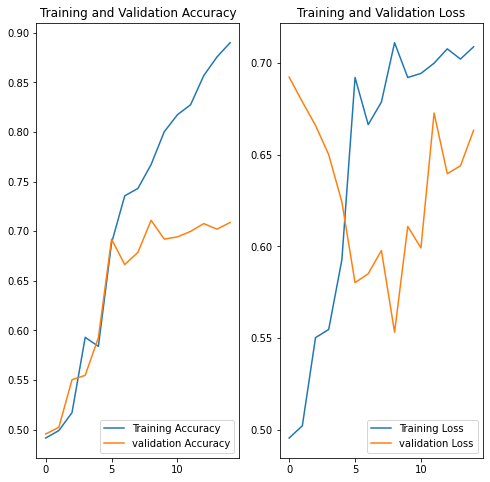

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.show()

As we can see our training accuracy is increasingly over time but validation accuracy drops off by large margin. This means our model cannot generalize new data effectively. This phenomenon is known as overfitting. This happens mainly due to less number of datasets. To overcome this, there are few techniques such as **Data Augmentation** and **Dropout**

**Data Augmentation**

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [26]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


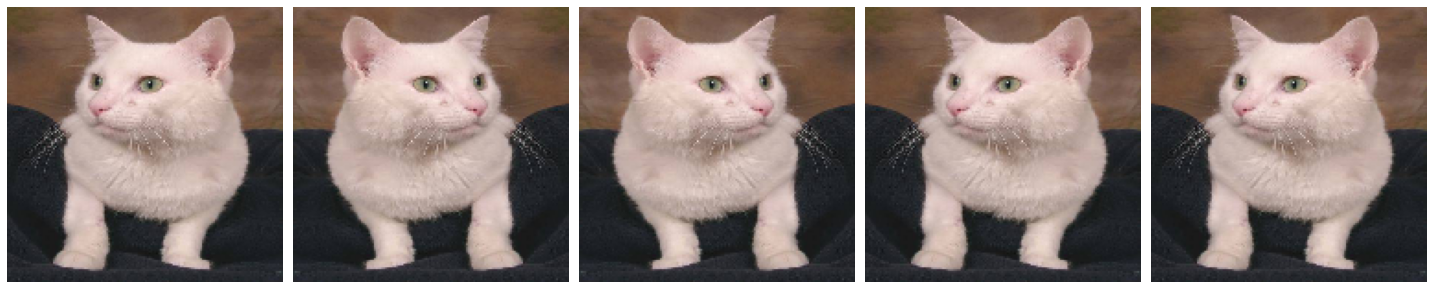

In [27]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Randomly rotating the images

In [28]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 2 classes.


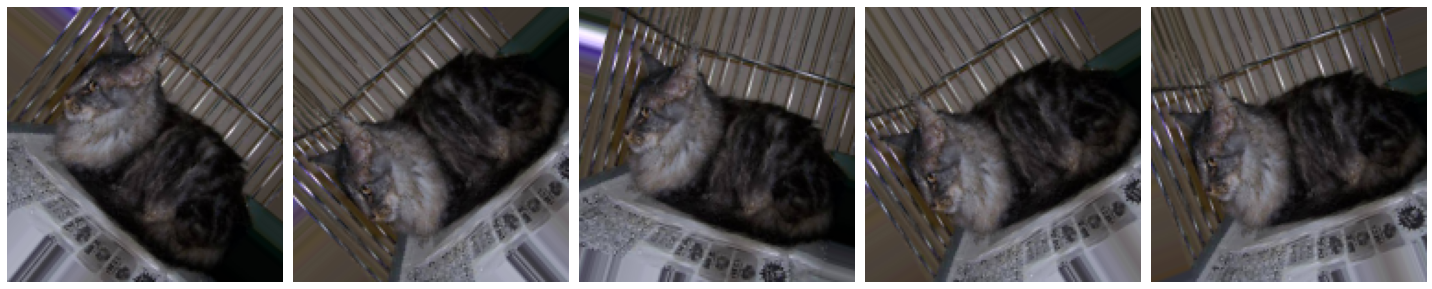

In [29]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying zoom augmentation

Found 2000 images belonging to 2 classes.


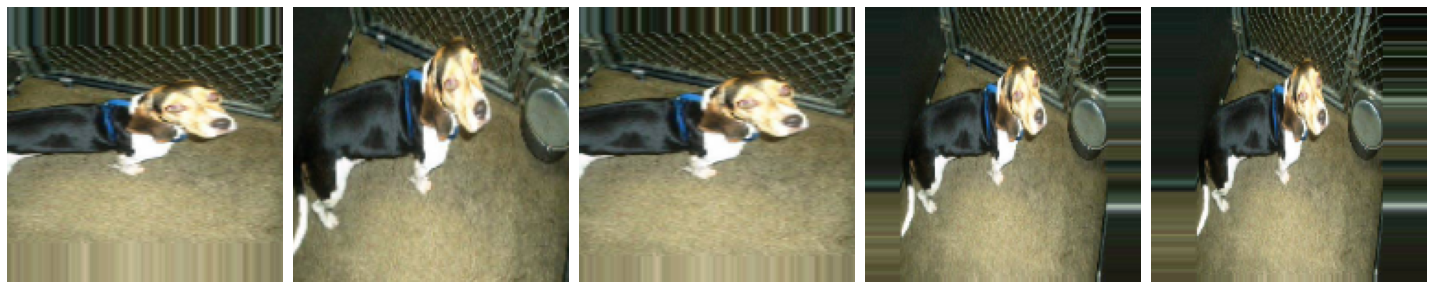

In [31]:
#zoom_range from 0 -1 where 1 = 100%
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT,IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Applying all augmentations together

In [32]:
image_gen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5
)

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


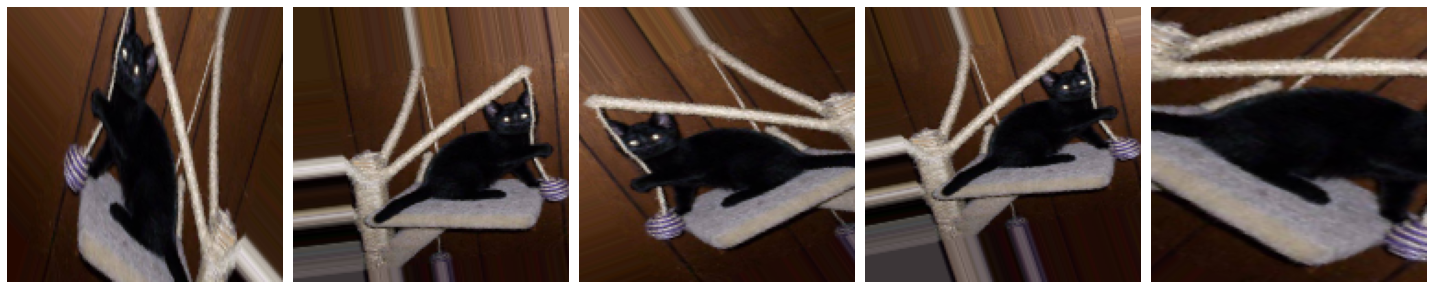

In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

##Creating validation data generator

In [35]:
image_gen_val = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                     directory=validation_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1000 images belonging to 2 classes.


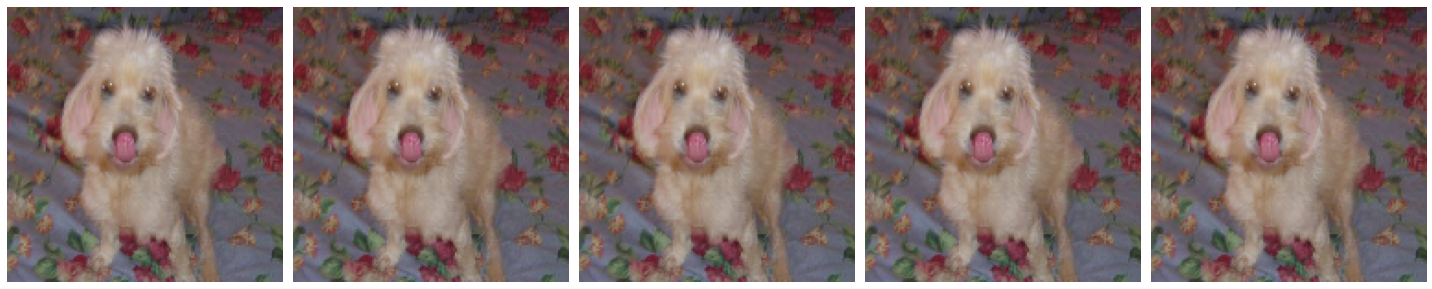

In [36]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

# **Dropout**
Creating a new network woth Dropouts

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1)
])

In [0]:
#Compiling the model
model_new.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics='accuracy')

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

# Training the model

In [43]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 9s 577ms/step - loss: 0.8855 - accuracy: 0.5069 - val_loss: 0.6909 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 9s 574ms/step - loss: 0.6885 - accuracy: 0.4984 - val_loss: 0.6775 - val_accuracy: 0.4978
Epoch 3/15
15/15 [==============================] - 9s 569ms/step - loss: 0.6633 - accuracy: 0.5459 - val_loss: 0.6209 - val_accuracy: 0.5781
Epoch 4/15
15/15 [==============================] - 9s 568ms/step - loss: 0.5830 - accuracy: 0.6608 - val_loss: 0.5317 - val_accuracy: 0.7020
Epoch 5/15
15/15 [==============================] - 9s 572ms/step - loss: 0.5276 - accuracy: 0.7196 - val_loss: 0.4696 - val_accuracy: 0.7511
Epoch 6/15
15/15 [==============================] - 9s 573ms/step - loss: 0.4799 - accuracy: 0.7564 - val_loss: 0.4153 - val_accuracy: 0.7879
Epoch 7/15
15/15 [==============================] - 8s 563ms/step - loss: 0.4226 - accuracy: 0.7821 - val_loss: 0.3544 - val_accuracy: 0.8371
Epoch 

## Visualizing the model

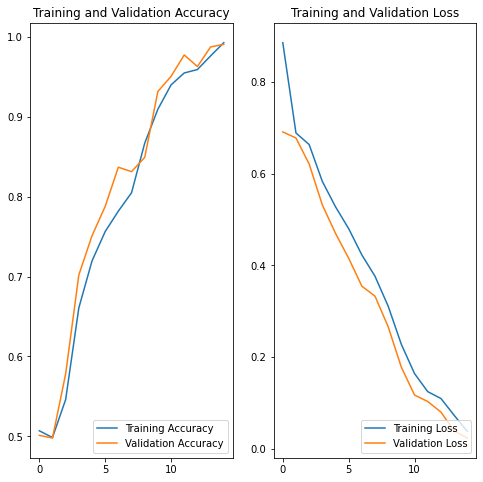

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1 ,2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt.show()